In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/car data.csv")
print(df.head())
print(df.info())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [2]:
# Convert year to car age
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year'], axis=1, inplace=True)
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)


In [4]:
# Selling_Price is usually the target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
# Predict
y_pred = model.predict(X_test)


In [9]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.6327901639344266
R² Score: 0.9602692963363297


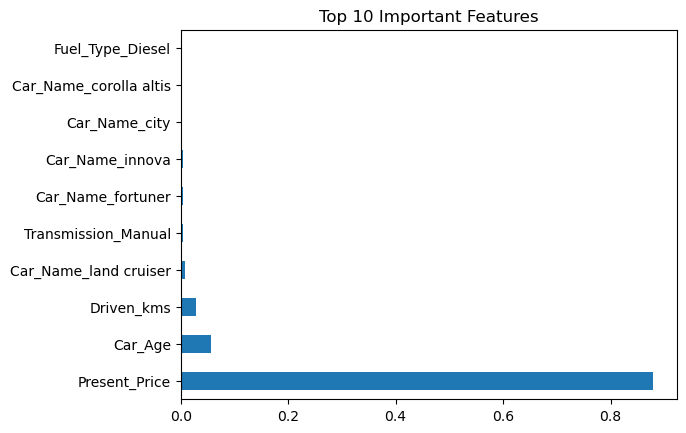

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()